In [1]:
from spc_imports import *
set_up_plt()
import MDAnalysis as mda
import glob
import sys
import nglview as nv 
sys.path.append("..")
import data_process
from src.features.build_features import get_sparta_plus_chemical_shifts

/home/sperez/bin/PYTHON_SCRIPTS/spc_imports.py:21: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams["text.latex.preamble"] = [


In [3]:
raw_data_dir = '../data/raw/'
processed_data_dir = '../data/processed/'

Load the trajectory

In [4]:
state = '5VKH_3FB5_string'
pdbs = sorted(glob.glob(raw_data_dir+f'{state}/*gro'))
univ = mda.Universe(raw_data_dir+f'{state}/topo.psf',pdbs)

/data/sperez/bin2/anaconda3/envs/nmr_assign_state/lib/python3.8/site-packages/MDAnalysis/coordinates/base.py:865: UserWarning: Reader has no dt information, set to 1.0 ps
  warnings.warn("Reader has no dt information, set to 1.0 ps")


In [5]:
view = nv.show_mdanalysis(univ)
view.clear()
view.add_cartoon()

In [6]:
view

NGLWidget(max_frame=9)

Get the NMR shifts with ppm

In [7]:
%%time
df=get_sparta_plus_chemical_shifts(univ,'../data/interim/')

t(PROD): 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]

CPU times: user 21.6 s, sys: 180 ms, total: 21.8 s
Wall time: 33.6 s


In [8]:
df.to_pickle(f'{processed_data_dir}CS_{state}.pkl')

Opening of the bundle

In [104]:
dis=[]
for ts in univ.trajectory:
    d=0.
    for a,b in [['A','B'],['C','D']]:
        atom_a=univ.select_atoms(
        f'segid PRO{a} and resid 112').center_of_mass()
        atom_b=univ.select_atoms(
        f'segid PRO{b} and resid 112').center_of_mass()
        d+=np.linalg.norm(atom_a-atom_b)
    dis.append(d/2.)
dis = np.array(dis + dis + dis + dis)

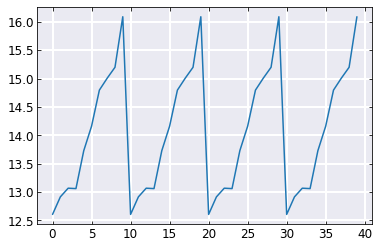

In [105]:
plt.plot(dis)

In [106]:
np.savetxt(f'{processed_data_dir}opening_{state}.pkl',dis)

Correlate opening with Chemical shifts

In [107]:
df = pd.read_pickle(f'{processed_data_dir}CS_{state}.pkl')

In [108]:
dis=np.loadtxt(f'{processed_data_dir}opening_{state}.pkl')

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [110]:
np.unique(df.index.levels[1])

array(['C', 'CA', 'CB', 'H', 'HA', 'HA2', 'HA3', 'N'], dtype=object)

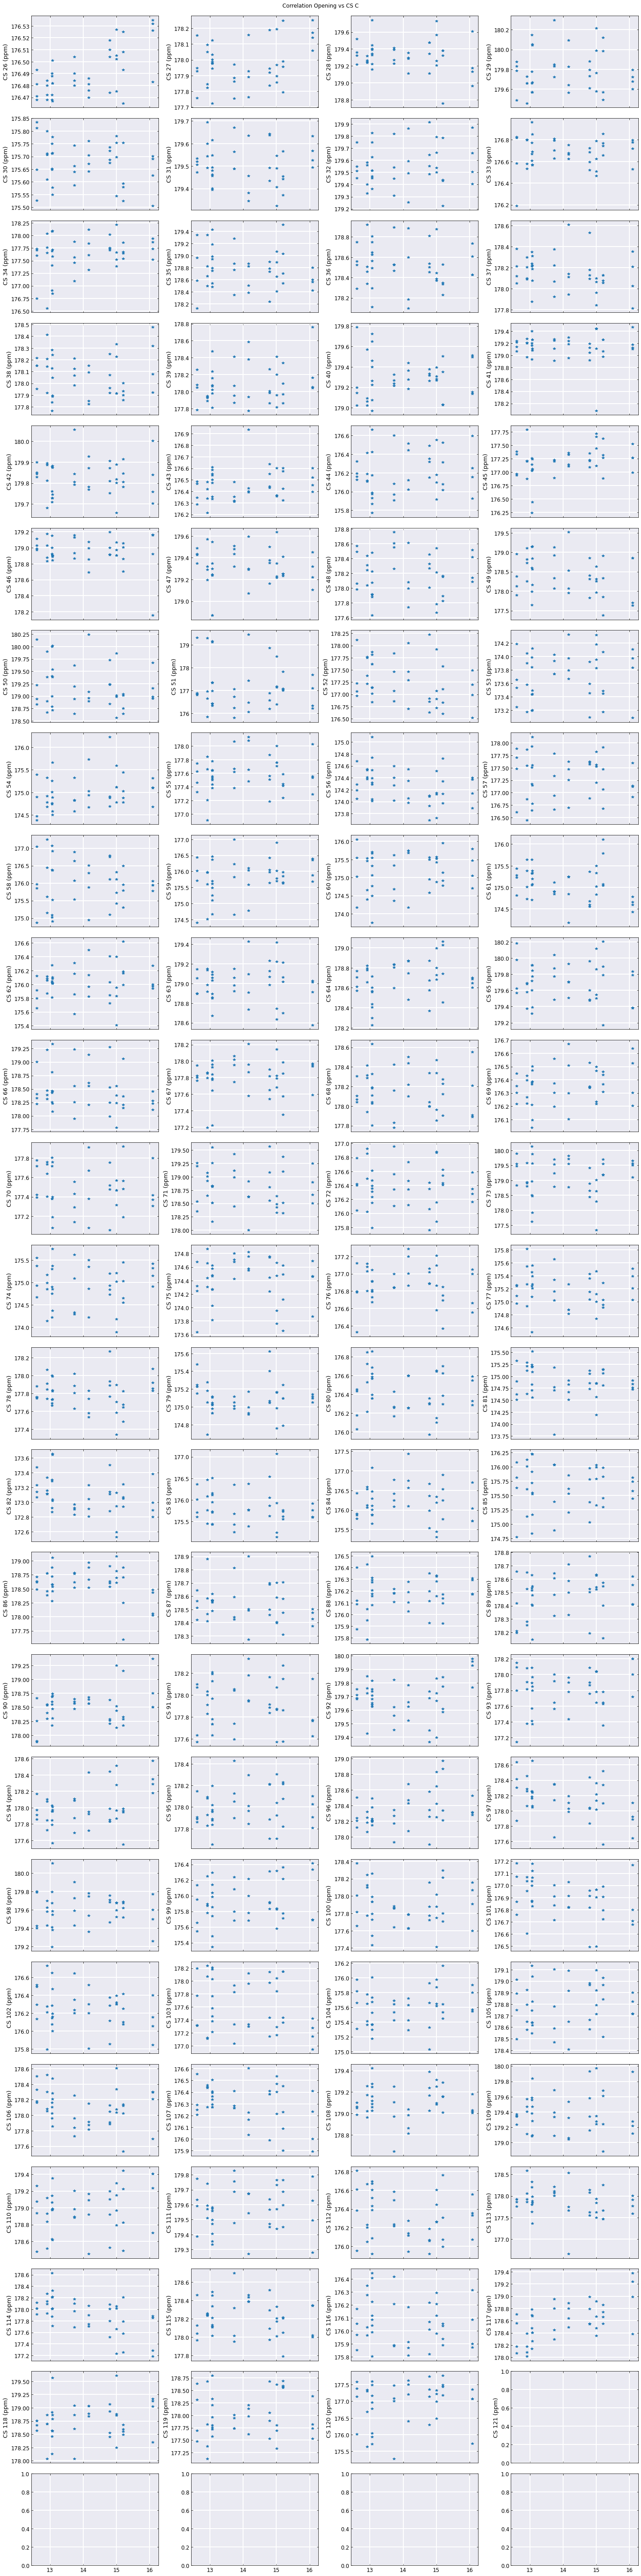

In [118]:
atom = 'C'
n_residues = len(np.unique(df.index.levels[0]))
residues = np.unique(df.index.levels[0])
fig, ax = plt.subplots(n_residues//4+1,4,figsize=(20,80),sharex=True)
ax=ax.flatten()
for i,resid in enumerate(residues):
    if atom in df.loc[resid].index:
        x=dis.reshape(-1, 1)
        y=df.loc[resid,atom].to_numpy().reshape(-1, 1)
        model = LinearRegression()
        model.fit(x,y)
        r2=r2_score(y, model.predict(x))
        if r2 > 0.5:
            print(f'{resid} R2:',r2)
        ax[i].plot(x,y,ls='',marker='*')
    ax[i].set_ylabel(f'CS {resid} (ppm)')
fig.suptitle(f'Correlation Opening vs CS {atom}',y=0.999)
fig.tight_layout()

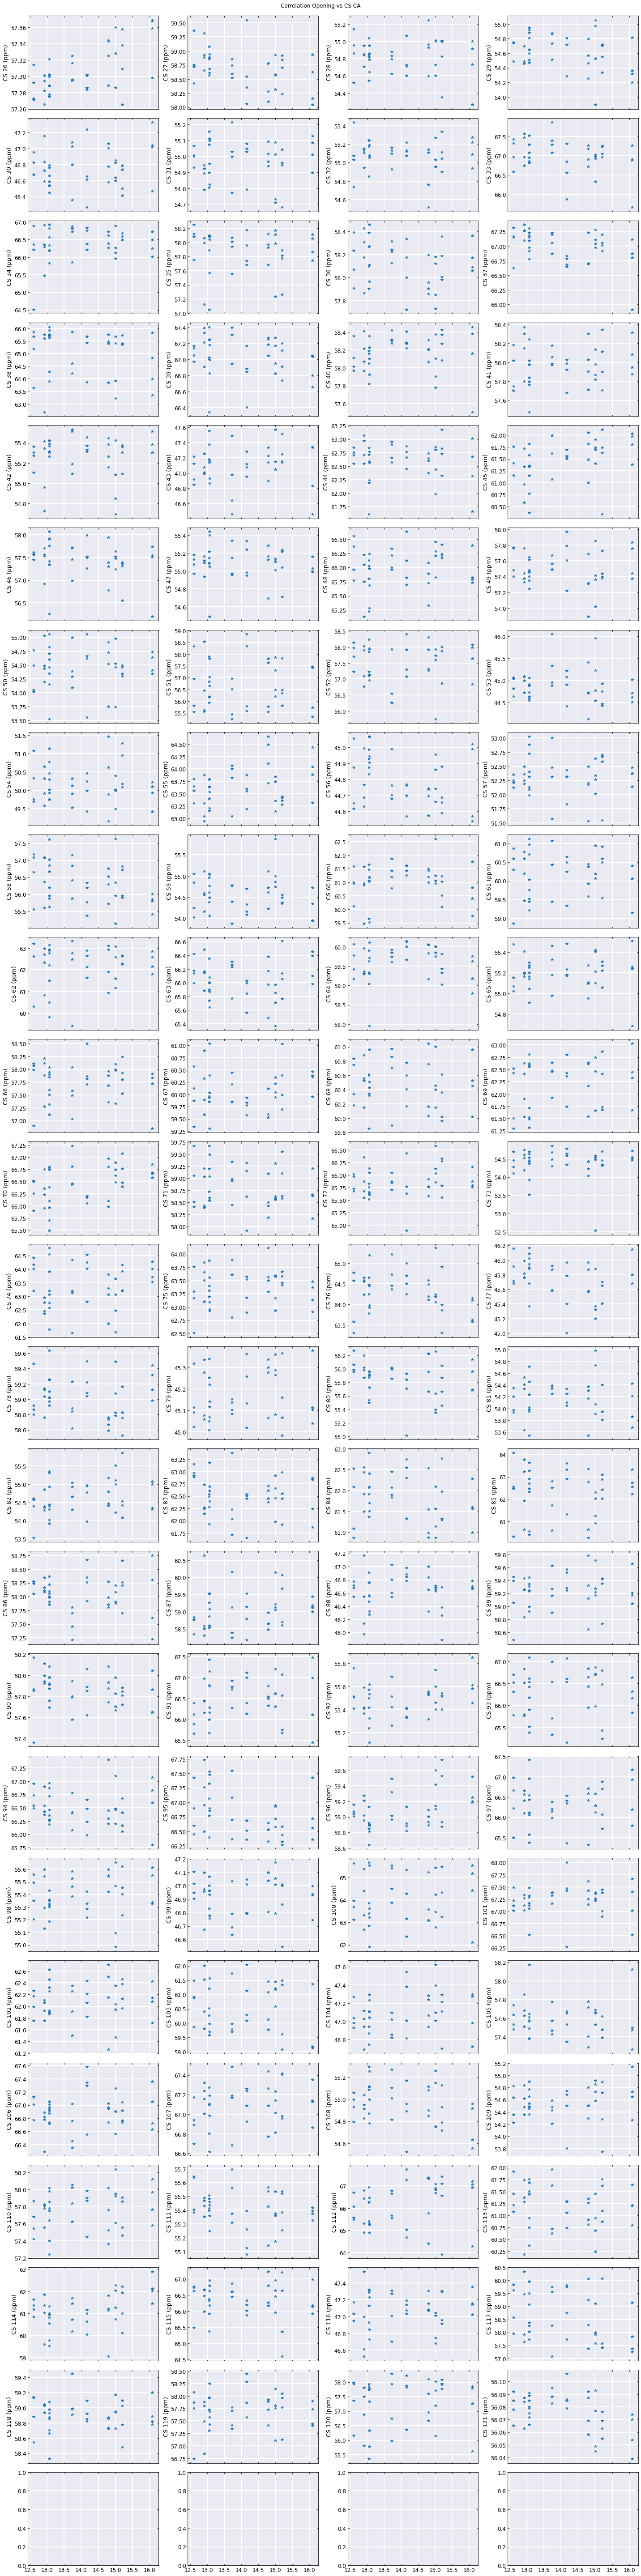

In [119]:
atom = 'CA'
n_residues = len(np.unique(df.index.levels[0]))
residues = np.unique(df.index.levels[0])
fig, ax = plt.subplots(n_residues//4+1,4,figsize=(20,80),sharex=True)
ax=ax.flatten()
for i,resid in enumerate(residues):
    if atom in df.loc[resid].index:
        x=dis.reshape(-1, 1)
        y=df.loc[resid,atom].to_numpy().reshape(-1, 1)
        model = LinearRegression()
        model.fit(x,y)
        r2=r2_score(y, model.predict(x))
        if r2 > 0.5:
            print(f'{resid} R2:',r2)
        ax[i].plot(x,y,ls='',marker='*')
    ax[i].set_ylabel(f'CS {resid} (ppm)')
fig.suptitle(f'Correlation Opening vs CS {atom}',y=0.999)
fig.tight_layout()

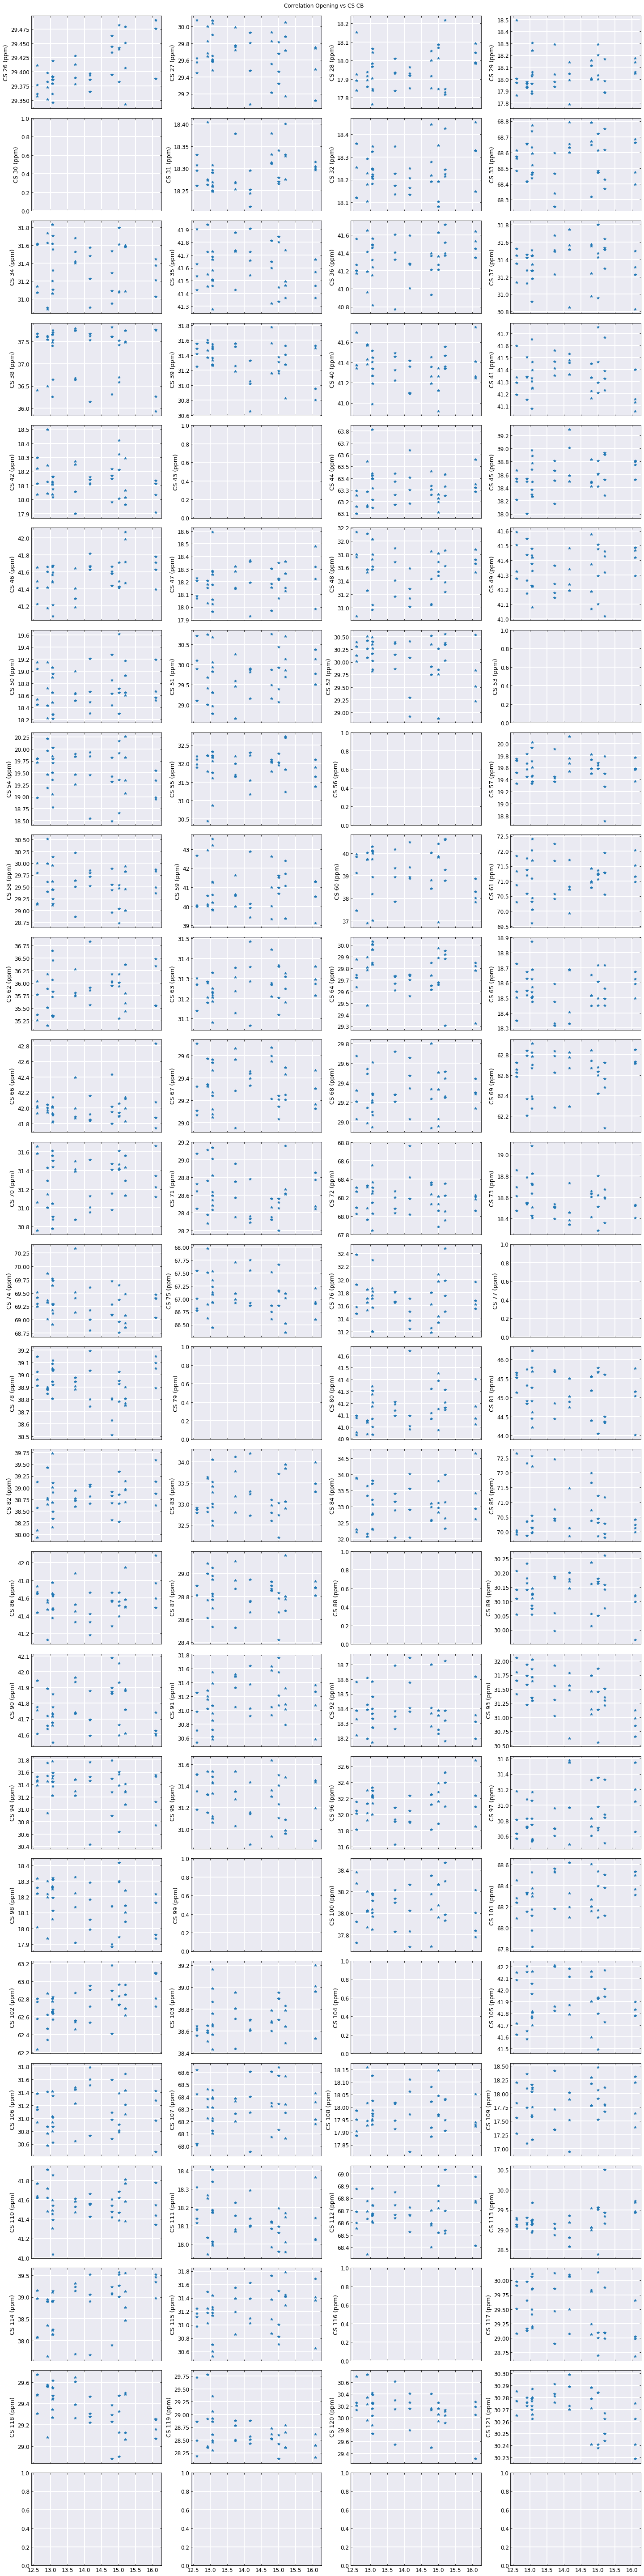

In [120]:
atom = 'CB'
n_residues = len(np.unique(df.index.levels[0]))
residues = np.unique(df.index.levels[0])
fig, ax = plt.subplots(n_residues//4+1,4,figsize=(20,80),sharex=True)
ax=ax.flatten()
for i,resid in enumerate(residues):
    if atom in df.loc[resid].index:
        x=dis.reshape(-1, 1)
        y=df.loc[resid,atom].to_numpy().reshape(-1, 1)
        model = LinearRegression()
        model.fit(x,y)
        r2=r2_score(y, model.predict(x))
        if r2 > 0.5:
            print(f'{resid} R2:',r2)
        ax[i].plot(x,y,ls='',marker='*')
    ax[i].set_ylabel(f'CS {resid} (ppm)')
fig.suptitle(f'Correlation Opening vs CS {atom}',y=0.999)
fig.tight_layout()

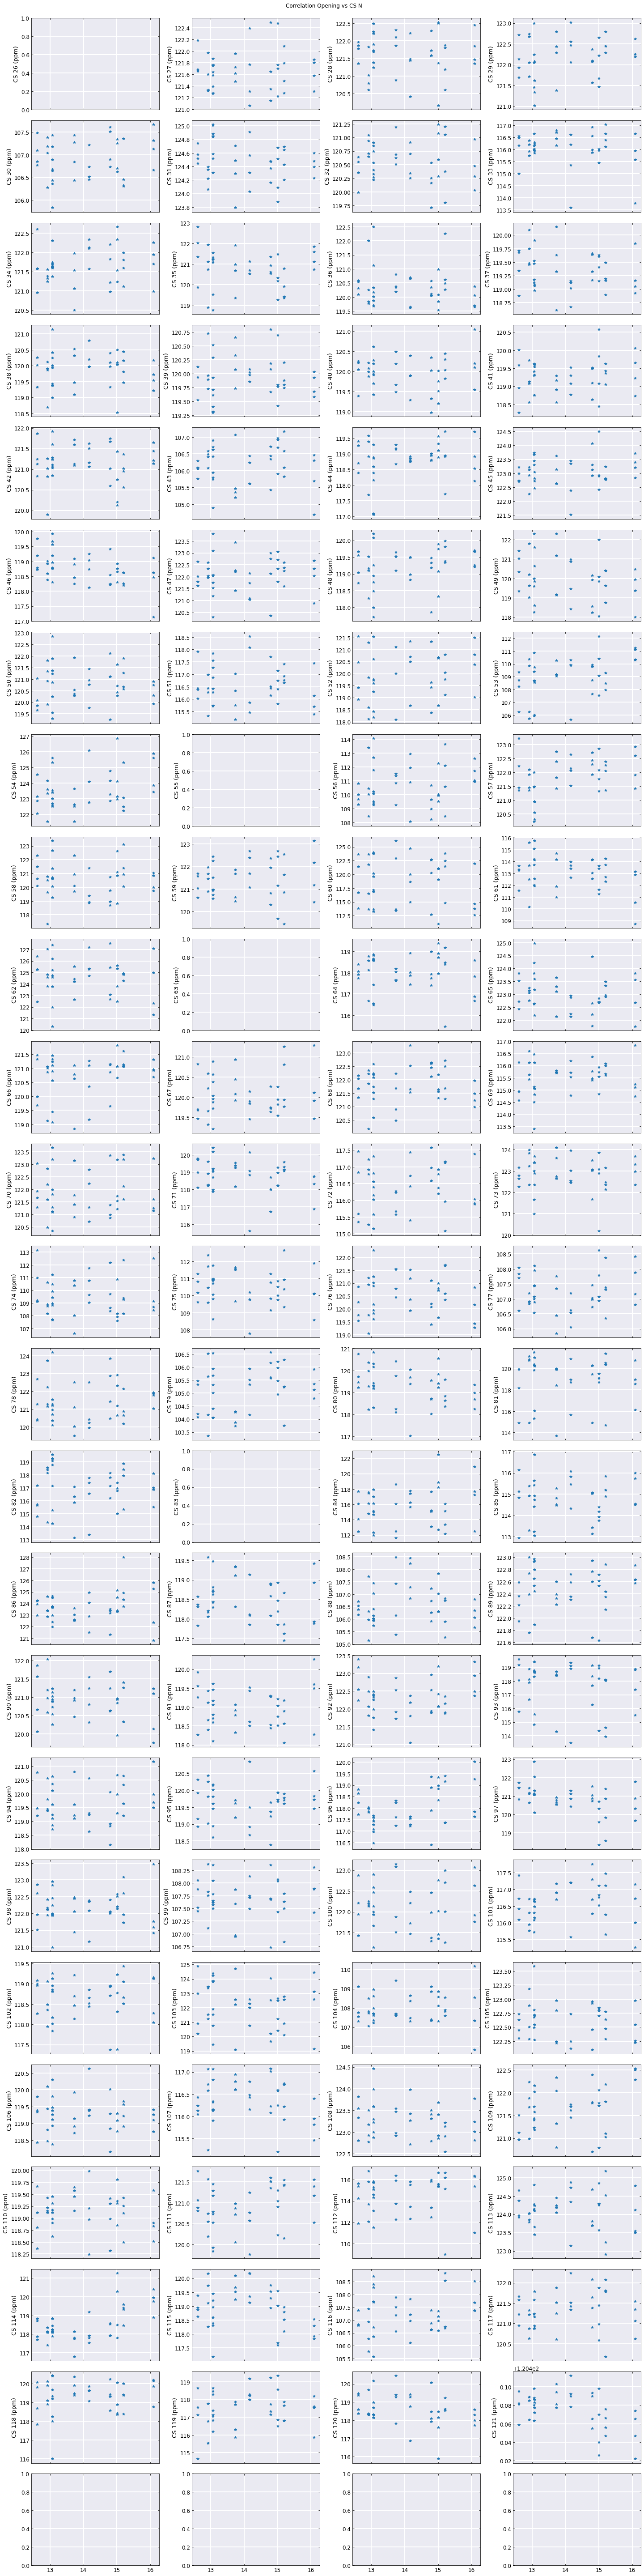

In [121]:
atom = 'N'
n_residues = len(np.unique(df.index.levels[0]))
residues = np.unique(df.index.levels[0])
fig, ax = plt.subplots(n_residues//4+1,4,figsize=(20,80),sharex=True)
ax=ax.flatten()
for i,resid in enumerate(residues):
    if atom in df.loc[resid].index:
        x=dis.reshape(-1, 1)
        y=df.loc[resid,atom].to_numpy().reshape(-1, 1)
        model = LinearRegression()
        model.fit(x,y)
        r2=r2_score(y, model.predict(x))
        if r2 > 0.5:
            print(f'{resid} R2:',r2)
        ax[i].plot(x,y,ls='',marker='*')
    ax[i].set_ylabel(f'CS {resid} (ppm)')
fig.suptitle(f'Correlation Opening vs CS {atom}',y=0.999)
fig.tight_layout()